In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]
df1 = yf.download(stocks, start="2020-12-25", end="2025-12-24")
df1.head()

/tmp/ipython-input-282389438.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download(stocks, start="2020-12-25", end="2025-12-24")
[*********************100%***********************]  5 of 5 completed


Price            Close                                                 \
Ticker            AAPL        AMZN      GOOGL        META        MSFT   
Date                                                                    
2020-12-28  133.061218  164.197998  88.032860  275.078491  215.858063   
2020-12-29  131.289505  166.100006  87.228928  274.859985  215.080795   
2020-12-30  130.170044  164.292496  86.161491  269.984039  212.710754   
2020-12-31  129.167374  162.846497  86.974846  271.265106  213.420822   
2021-01-04  125.974480  159.331497  85.659279  267.074402  208.882233   

Price             High                                                 ...  \
Ticker            AAPL        AMZN      GOOGL        META        MSFT  ...   
Date                                                                   ...   
2020-12-28  133.693956  165.199997  88.679971  275.376398  216.884763  ...   
2020-12-29  135.105436  167.532501  88.752912  278.564121  217.988199  ...   
2020-12-30  132.379785  167.104996  87.725177  276.150952  216.500948  ...   
2020-12-31  131.162954  164.145996  87.216020  275.167837  213.977357  ...   
2021-01-04  130.062977  163.600006  87.463639  273.092362  213.977387  ...   

Price             Open                                                 \
Ticker            AAPL        AMZN      GOOGL        META        MSFT   
Date                                                                    
2020-12-28  130.432900  159.699997  86.591253  266.875780  215.368688   
2020-12-29  134.385091  165.496994  88.691381  275.028819  217.153404   
2020-12-30  131.980666  167.050003  87.588212  276.021879  216.117123   
2020-12-31  130.520472  163.750000  86.212108  270.113149  212.729952   
2021-01-04  129.975370  163.500000  87.340076  272.873887  213.526402   

Price          Volume                                           
Ticker           AAPL       AMZN     GOOGL      META      MSFT  
Date                                                            
2020-12-28  124486200  113736000  27650000  23299700  17933500  
2020-12-29  121047300   97458000  19726000  16383000  17403200  
2020-12-30   96452100   64186000  21026000  11803800  20272300  
2020-12-31   99116600   59144000  21070000  12900400  20942100  
2021-01-04  143301900   88228000  37324000  15106100  37130100  

[5 rows x 25 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2020-12-28 to 2025-12-23
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    1254 non-null   float64
 1   (Close, AMZN)    1254 non-null   float64
 2   (Close, GOOGL)   1254 non-null   float64
 3   (Close, META)    1254 non-null   float64
 4   (Close, MSFT)    1254 non-null   float64
 5   (High, AAPL)     1254 non-null   float64
 6   (High, AMZN)     1254 non-null   float64
 7   (High, GOOGL)    1254 non-null   float64
 8   (High, META)     1254 non-null   float64
 9   (High, MSFT)     1254 non-null   float64
 10  (Low, AAPL)      1254 non-null   float64
 11  (Low, AMZN)      1254 non-null   float64
 12  (Low, GOOGL)     1254 non-null   float64
 13  (Low, META)      1254 non-null   float64
 14  (Low, MSFT)      1254 non-null   float64
 15  (Open, AAPL)     1254 non-null   float64
 16  (Open, AMZN)     1254 non-null   float64
 

In [ ]:
df1.to_csv("stocks.csv")

In [ ]:
df = pd.read_csv('stocks.csv', header=[0, 1], index_col=0, parse_dates=True)
df.columns = [f'{col[1]}_{col[0]}' if col[0] != 'Price' else col[1] for col in df.columns]
df = df.ffill().dropna()
close_cols = [col for col in df.columns if '_Close' in col]
returns_df = df[close_cols].pct_change().dropna()

In [ ]:
df.head()

,AAPL_Close,AMZN_Close,GOOGL_Close,META_Close,MSFT_Close,AAPL_High,AMZN_High,GOOGL_High,META_High,MSFT_High,...,AAPL_Open,AMZN_Open,GOOGL_Open,META_Open,MSFT_Open,AAPL_Volume,AMZN_Volume,GOOGL_Volume,META_Volume,MSFT_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28,133.061218,164.197998,88.032860,275.078491,215.858063,133.693956,165.199997,88.679971,275.376398,216.884763,...,130.432900,159.699997,86.591253,266.875780,215.368688,124486200,113736000,27650000,23299700,17933500
2020-12-29,131.289505,166.100006,87.228928,274.859985,215.080795,135.105436,167.532501,88.752912,278.564121,217.988199,...,134.385091,165.496994,88.691381,275.028819,217.153404,121047300,97458000,19726000,16383000,17403200
2020-12-30,130.170044,164.292496,86.161491,269.984039,212.710754,132.379785,167.104996,87.725177,276.150952,216.500948,...,131.980666,167.050003,87.588212,276.021879,216.117123,96452100,64186000,21026000,11803800,20272300
2020-12-31,129.167374,162.846497,86.974846,271.265106,213.420822,131.162954,164.145996,87.216020,275.167837,213.977357,...,130.520472,163.750000,86.212108,270.113149,212.729952,99116600,59144000,21070000,12900400,20942100
2021-01-04,125.974480,159.331497,85.659279,267.074402,208.882233,130.062977,163.600006,87.463639,273.092362,213.977387,...,129.975370,163.500000,87.340076,272.873887,213.526402,143301900,88228000,37324000,15106100,37130100


In [ ]:
returns_df.head()

,AAPL_Close,AMZN_Close,GOOGL_Close,META_Close,MSFT_Close
Date,,,,,
2020-12-29,-0.013315,0.011584,-0.009132,-0.000794,-0.003601
2020-12-30,-0.008527,-0.010882,-0.012237,-0.017740,-0.011019
2020-12-31,-0.007703,-0.008801,0.009440,0.004745,0.003338
2021-01-04,-0.024719,-0.021585,-0.015126,-0.015449,-0.021266
2021-01-05,0.012364,0.010004,0.008064,0.007548,0.000964


In [ ]:
df.to_csv("cleaned_stock.csv")
returns_df.to_csv("cleaned_returns.csv")

In [ ]:
prices = pd.read_csv("cleaned_stock.csv", parse_dates = ["Date"])
returns = pd.read_csv("cleaned_returns.csv", parse_dates = ["Date"], index_col=0)

In [ ]:
prices.head()

,Date,AAPL_Close,AMZN_Close,GOOGL_Close,META_Close,MSFT_Close,AAPL_High,AMZN_High,GOOGL_High,META_High,...,AAPL_Open,AMZN_Open,GOOGL_Open,META_Open,MSFT_Open,AAPL_Volume,AMZN_Volume,GOOGL_Volume,META_Volume,MSFT_Volume
0,2020-12-28,133.061218,164.197998,88.032860,275.078491,215.858063,133.693956,165.199997,88.679971,275.376398,...,130.432900,159.699997,86.591253,266.875780,215.368688,124486200,113736000,27650000,23299700,17933500
1,2020-12-29,131.289505,166.100006,87.228928,274.859985,215.080795,135.105436,167.532501,88.752912,278.564121,...,134.385091,165.496994,88.691381,275.028819,217.153404,121047300,97458000,19726000,16383000,17403200
2,2020-12-30,130.170044,164.292496,86.161491,269.984039,212.710754,132.379785,167.104996,87.725177,276.150952,...,131.980666,167.050003,87.588212,276.021879,216.117123,96452100,64186000,21026000,11803800,20272300
3,2020-12-31,129.167374,162.846497,86.974846,271.265106,213.420822,131.162954,164.145996,87.216020,275.167837,...,130.520472,163.750000,86.212108,270.113149,212.729952,99116600,59144000,21070000,12900400,20942100
4,2021-01-04,125.974480,159.331497,85.659279,267.074402,208.882233,130.062977,163.600006,87.463639,273.092362,...,129.975370,163.500000,87.340076,272.873887,213.526402,143301900,88228000,37324000,15106100,37130100


In [ ]:
returns.head()

,AAPL_Close,AMZN_Close,GOOGL_Close,META_Close,MSFT_Close
Date,,,,,
2020-12-29,-0.013315,0.011584,-0.009132,-0.000794,-0.003601
2020-12-30,-0.008527,-0.010882,-0.012237,-0.017740,-0.011019
2020-12-31,-0.007703,-0.008801,0.009440,0.004745,0.003338
2021-01-04,-0.024719,-0.021585,-0.015126,-0.015449,-0.021266
2021-01-05,0.012364,0.010004,0.008064,0.007548,0.000964


In [ ]:
returns.describe()

,AAPL_Close,AMZN_Close,GOOGL_Close,META_Close,MSFT_Close
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.000726,0.000521,0.001209,0.001083,0.000780
std,0.017580,0.022137,0.019640,0.027364,0.016219
min,-0.092456,-0.140494,-0.095094,-0.263901,-0.077156
25%,-0.008111,-0.011248,-0.009534,-0.011528,-0.007628
50%,0.001049,0.000423,0.001616,0.000797,0.000785
75%,0.009846,0.012561,0.011522,0.013946,0.009967
max,0.153288,0.135359,0.102244,0.232824,0.101337


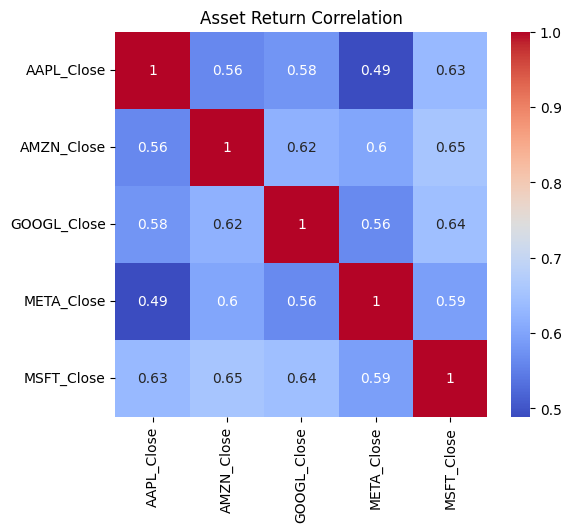

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Asset Return Correlation")
plt.show()

In [ ]:
#parameter estimation
mu_hat = returns.mean().values
Sigma_hat = returns.cov().values
n_assets = len(mu_hat)

In [ ]:
#markowitz portfolio
import numpy as np
import cvxpy as cp
returns = returns.apply(lambda x: pd.to_numeric(x, errors='coerce'))
returns = returns.dropna()
mu_hat = np.asarray(returns.mean(), dtype=float)
Sigma_hat = np.asarray(returns.cov(), dtype=float)
n_assets = mu_hat.shape[0]
Sigma_hat = (Sigma_hat + Sigma_hat.T) / 2
w = cp.Variable(n_assets)
risk_aversion = 1.0
objective = cp.Maximize(
    mu_hat @ w - risk_aversion * cp.quad_form(w, Sigma_hat)
)
constraints = [
    cp.sum(w) == 1,
    w >= 0
]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.SCS)
w_mv = w.value
w_mv

array([-1.07659283e-08, -9.44411953e-09,  9.62376487e-01,  3.76235324e-02,
        6.93343378e-11])

In [ ]:
X = []
y = []

lookback = 20

for t in range(lookback, len(returns) - 1):
    X.append(returns.iloc[t-lookback:t].values.flatten())
    y.append(returns.iloc[t + 1].values)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1232, 100)
y shape: (1232, 5)


In [ ]:
#supervised learning
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
X.shape

(1232, 100)

In [ ]:
y.shape

(1232, 5)

In [ ]:
#neural network
import torch
import torch.nn as nn

In [ ]:
class ReturnPredictor(nn.Module):
    def __init__(self, input_dim, n_assets):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, n_assets)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
#mean variance (differentiable)
def mean_variance_layer(mu_pred, Sigma, risk_aversion=1.0, l2_reg=0.1):
    """
    Optimized layer with L2 regularization to prevent model collapse/concentration.
    l2_reg: Higher values force more diversification.
    """
    Sigma_t = torch.as_tensor(Sigma, dtype=torch.float32)
    n = Sigma_t.shape[0]
    A = risk_aversion * Sigma_t + l2_reg * torch.eye(n)

    try:
        w = torch.linalg.solve(A, mu_pred.unsqueeze(-1)).squeeze(-1)
    except Exception as e:
        return torch.ones_like(mu_pred) / n
    return torch.softmax(w, dim=-1)

In [ ]:
#transaction cost + turnover penalty
def spo_loss(mu_true, mu_pred, Sigma, w_prev, tc=0.001, gamma=0.1):
    Sigma_t = torch.as_tensor(Sigma, dtype=torch.float32, device=mu_pred.device)
    w = mean_variance_layer(mu_pred, Sigma_t)
    ret = torch.dot(mu_true, w)
    risk = torch.matmul(w, torch.matmul(Sigma_t, w))
    turnover = torch.sum(torch.abs(w - w_prev))
    loss = -ret + risk + (tc + gamma) * turnover
    return loss, w

In [ ]:
#neural network
import torch
import torch.optim as optim
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)
Sigma_tensor = torch.tensor(Sigma_hat, dtype=torch.float32)
input_dim = X_t.shape[1]
n_assets = y_t.shape[1]
model = ReturnPredictor(input_dim, n_assets)
LR = 5e-4
BATCH_SIZE = 32
EPOCHS = 50
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

In [ ]:
best_val_loss = float("inf")
patience = 10
counter = 0

loss_fn = nn.MSELoss()

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    pred = model(X_train_t)
    train_loss = loss_fn(pred, y_train_t)
    train_loss.backward()
    optimizer.step()
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_t)
        val_loss = loss_fn(val_pred, y_val_t)

    print(f"Epoch {epoch}: Train={train_loss:.4f}, Val={val_loss:.4f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print("Early stopping triggered")
        break

Epoch 0: Train=0.0686, Val=0.0454
Epoch 1: Train=0.0663, Val=0.0422
Epoch 2: Train=0.0624, Val=0.0393
Epoch 3: Train=0.0596, Val=0.0367
Epoch 4: Train=0.0543, Val=0.0342
Epoch 5: Train=0.0503, Val=0.0321
Epoch 6: Train=0.0486, Val=0.0301
Epoch 7: Train=0.0478, Val=0.0283
Epoch 8: Train=0.0431, Val=0.0267
Epoch 9: Train=0.0413, Val=0.0253
Epoch 10: Train=0.0395, Val=0.0240
Epoch 11: Train=0.0393, Val=0.0228
Epoch 12: Train=0.0371, Val=0.0217
Epoch 13: Train=0.0363, Val=0.0208
Epoch 14: Train=0.0336, Val=0.0199
Epoch 15: Train=0.0344, Val=0.0191
Epoch 16: Train=0.0332, Val=0.0183
Epoch 17: Train=0.0317, Val=0.0177
Epoch 18: Train=0.0293, Val=0.0170
Epoch 19: Train=0.0288, Val=0.0165
Epoch 20: Train=0.0290, Val=0.0160
Epoch 21: Train=0.0284, Val=0.0155
Epoch 22: Train=0.0269, Val=0.0150
Epoch 23: Train=0.0256, Val=0.0146
Epoch 24: Train=0.0269, Val=0.0142
Epoch 25: Train=0.0253, Val=0.0138
Epoch 26: Train=0.0252, Val=0.0135
Epoch 27: Train=0.0238, Val=0.0131
Epoch 28: Train=0.0231, Val=0.

In [ ]:
#model evaluation
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

ReturnPredictor(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=5, bias=True)
  )
)

In [ ]:
#predictor & recommender
import torch
import numpy as np
def predict_next_day_outcome(model, scaler, returns_df, sigma_hat, window_size=20):
    recent_data = returns_df.iloc[-window_size:].values
    recent_data_flat = recent_data.flatten().reshape(1, -1)
    X_scaled = scaler.transform(recent_data_flat)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        mu_pred = model(X_tensor)
    weights = mean_variance_layer(mu_pred[0], sigma_hat, risk_aversion=1.0, l2_reg=0.5)
    asset_names = returns_df.columns.tolist()
    predicted_returns = mu_pred[0].numpy()
    optimal_weights = weights.numpy()
    print("--- Diversified Prediction for the Next Trading Day ---")
    print(f"Based on historical data up to: {returns_df.index[-1].date()}")
    results = []
    for i, name in enumerate(asset_names):
        results.append({
            "Asset": name,
            "Pred_Return": f"{predicted_returns[i]:.6f}",
            "Opt_Weight": f"{optimal_weights[i]*100:.2f}%"
        })
    return pd.DataFrame(results)
prediction_results = predict_next_day_outcome(model, scaler, returns, Sigma_hat, window_size=20)
print(prediction_results)

--- Diversified Prediction for the Next Trading Day ---
Based on historical data up to: 2025-12-23
         Asset Pred_Return Opt_Weight
0   AAPL_Close    0.013360     19.91%
1   AMZN_Close    0.105011     23.92%
2  GOOGL_Close    0.054981     21.64%
3   META_Close   -0.070732     16.83%
4   MSFT_Close   -0.045494     17.70%


/tmp/ipython-input-1674087783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Asset', y='Opt_Weight_Numeric', data=prediction_results, palette='viridis')


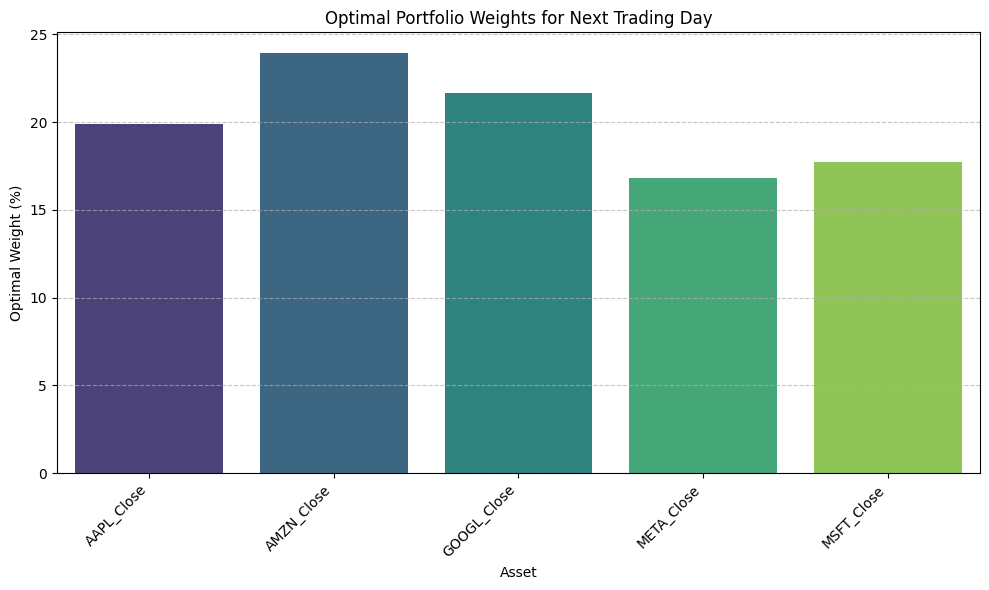

In [ ]:
prediction_results['Opt_Weight_Numeric'] = prediction_results['Opt_Weight'].str.replace('%', '').astype(float)
plt.figure(figsize=(10, 6))
sns.barplot(x='Asset', y='Opt_Weight_Numeric', data=prediction_results, palette='viridis')
plt.title('Optimal Portfolio Weights for Next Trading Day')
plt.xlabel('Asset')
plt.ylabel('Optimal Weight (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()